In [1]:
# -----------------------------------------------------------------------------
# :author:    Juanjuan Huang & Shelly D. Keylly
# :email:     juanjuan.huang@anl.gov
# :copyright: Copyright © 2023, UChicago Argonne, LLC
# -----------------------------------------------------------------------------


## Imports

In [2]:
# %matplotlib widget
import neighbor_core as nc
from neighbor_core import ClusterNeighbor
from ipyfilechooser import FileChooser
import numpy as np

# Example 1, basic functionality go through

## Initialize a cluster and view it

In [3]:
fc = FileChooser()
display(fc)

FileChooser(path='/Users/juanjuanhuang/Desktop/neighbor', filename='', title='', show_hidden=False, select_des…

## view it

In [4]:
cluster = ClusterNeighbor()
if fc.value is not None:
    cluster.load_xyz(path=fc.value)
else:
    cluster.load_xyz(path="structure_examples/198087-ICSD molecule.xyz")
cluster.view_xyz(label=True, show_symbol=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Plot histogram

In [5]:
cluster.get_pairs()
cluster.plot_hist(plot_engine="plotly")

## Get CN reports and save to excel

In [6]:
cluster.get_CN_summary_all(tolerance=0.1, bond_range=5, printit=False)
cluster.print_CN_summary()
cluster.write_to_excel("20240806_test_original.xlsx")

Bond Type: Pb-Pb
-- Distance: 3.389999918388575
-- Average CN: 0.8
-- Info: 
4 atoms have CN of 0; 
10 atoms have CN of 1; 
1 atoms have CN of 2; 
-- Tolerance: 0.1 

-- Distance: 3.895359489312166
-- Average CN: 4.266666666666667
-- Info: 
14 atoms have CN of 4; 
1 atoms have CN of 8; 
-- Tolerance: 0.1 

-- Distance: 4.960000056709095
-- Average CN: 1.6
-- Info: 
2 atoms have CN of 0; 
4 atoms have CN of 1; 
8 atoms have CN of 2; 
1 atoms have CN of 4; 
-- Tolerance: 0.1 

Bond Type: O-Pb
-- Distance: 2.164006661818935
-- Average CN: 1.7727272727272727
-- Info: 
20 atoms have CN of 1; 
14 atoms have CN of 2; 
10 atoms have CN of 3; 
-- Tolerance: 0.1 

-- Distance: 3.759464103600722
-- Average CN: 0.8181818181818182
-- Info: 
16 atoms have CN of 0; 
20 atoms have CN of 1; 
8 atoms have CN of 2; 
-- Tolerance: 0.1 

-- Distance: 4.0161487745681885
-- Average CN: 0.8181818181818182
-- Info: 
10 atoms have CN of 0; 
32 atoms have CN of 1; 
2 atoms have CN of 2; 
-- Tolerance: 0.1 

-- D

## remove undercoordinated atoms

In [7]:
cluster.remove_under_coordinated_atoms(center_atom="Pb", CN_atom="O", CN_threshold=4, bond_range=3, self_apply=True)
cluster.view_xyz(label=False, show_symbol=False)

Remove under-coordinated atoms: Atoms(symbols='Pb4', pbc=False)[[22, 37, 57, 58]]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [8]:
cluster.get_CN_summary_all(tolerance=0.1, bond_range=5, printit=False)
cluster.print_CN_summary()
cluster.write_to_excel("20240807_test_reduced.xlsx")

Bond Type: Pb-Pb
-- Distance: 3.389999918388575
-- Average CN: 1.0909090909090908
-- Info: 
10 atoms have CN of 1; 
1 atoms have CN of 2; 
-- Tolerance: 0.1 

-- Distance: 3.8953594869263837
-- Average CN: 2.909090909090909
-- Info: 
8 atoms have CN of 2; 
2 atoms have CN of 4; 
1 atoms have CN of 8; 
-- Tolerance: 0.1 

-- Distance: 4.95999997319618
-- Average CN: 1.4545454545454546
-- Info: 
3 atoms have CN of 0; 
8 atoms have CN of 2; 
-- Tolerance: 0.1 

Bond Type: O-Pb
-- Distance: 2.164006684677769
-- Average CN: 1.5
-- Info: 
28 atoms have CN of 1; 
10 atoms have CN of 2; 
6 atoms have CN of 3; 
-- Tolerance: 0.1 

-- Distance: 3.7594640623910167
-- Average CN: 0.6363636363636364
-- Info: 
20 atoms have CN of 0; 
20 atoms have CN of 1; 
4 atoms have CN of 2; 
-- Tolerance: 0.1 

-- Distance: 4.016148722271057
-- Average CN: 0.6363636363636364
-- Info: 
18 atoms have CN of 0; 
24 atoms have CN of 1; 
2 atoms have CN of 2; 
-- Tolerance: 0.1 

-- Distance: 4.450974886404176
-- Ave

# Example 2: Polynomial fits of different shells

## select a cif file

In [30]:
fc = FileChooser()
display(fc)

FileChooser(path='/Users/juanjuanhuang/Desktop/neighbor', filename='', title='', show_hidden=False, select_des…

In [31]:
cif_cluster = ClusterNeighbor()
if fc.value is not None:
    cif_cluster.load_xyz(path=fc.value)
else:
   cif_cluster.load_xyz(path="test_Pt/Ptfoil_243678.cif")
cif_cluster.view_xyz(label=True, show_symbol=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [32]:
cif_cluster.get_CN_all(tolerance=0.1, bond_range=10, printit=True)

Pt-Pt
1 length: 2.774  CN: 1968.000


## For multiple shells with undercoordinated atoms removed

In [38]:
center_atom = "Pt"
CN_atom = "Pt"
CN_bond_range = 6
tolerance = 0.1
undercoordinated_threshold = 4

# Initialize dictionaries to store results
CNs_all = {}
bondlengths_all = {}
num_atoms_all = {}
sizes_all = {}

sizes = np.hstack([np.arange(5, 20, 2), np.arange(20, 90, 10)])
# sizes = np.hstack([np.arange(5, 20, 5), np.arange(20, 40, 10)])

for i in sizes:
    expanded_cluster = cif_cluster.expand_to_sphere(target_diameter=i, self_apply=False)
    new_cluster = ClusterNeighbor()
    new_cluster.load_xyz(from_file=False, atom_object=expanded_cluster)
    num_atoms = len(new_cluster.atoms)
    new_cluster.atoms.set_pbc(False)

    if 4 < num_atoms < 100:
        new_cluster.remove_under_coordinated_atoms(center_atom=center_atom, 
                                                   CN_atom=CN_atom, 
                                                   CN_threshold=undercoordinated_threshold, 
                                                   bond_range=5, 
                                                   self_apply=True)
    
    new_cluster.get_CN_summary_all(tolerance=tolerance, 
                                   bond_range=CN_bond_range, 
                                   printit=False)
    
    # Get bond lengths for each shell
    bond_lengths = list(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'].keys())
    new_cluster.write_to_excel(f"size_{new_cluster.get_cluster_size():.2f}A")
    # new_cluster.print_CN_summary()
    for shell_index, bond_length in enumerate(bond_lengths):
        shell_key = f'shell_{shell_index + 1}'
        
        # Ensure the key exists in each dictionary
        if shell_key not in CNs_all:
            CNs_all[shell_key] = []
            bondlengths_all[shell_key] = []
            num_atoms_all[shell_key] = []
            sizes_all[shell_key] = []
        
        # Append data to the relevant shell
        bondlengths_all[shell_key].append(bond_length)
        CNs_all[shell_key].append(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'][bond_length]['average_CN'])
        sizes_all[shell_key].append(new_cluster.get_cluster_size())
        num_atoms_all[shell_key].append(num_atoms)
    
    print(f"Processed size: {new_cluster.get_cluster_size()} A with {len(bond_lengths)} shells")
    # print(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'])
    # new_cluster.view_xyz(label=False)


Processed size: 2.774093039679816 A with 1 shells
No under-coordinated atoms found.
Processed size: 6.203060612633091 A with 4 shells
No under-coordinated atoms found.
Processed size: 8.322279119039449 A with 4 shells
No under-coordinated atoms found.
Processed size: 10.002134697473334 A with 4 shells
No under-coordinated atoms found.
Processed size: 12.091991219943887 A with 4 shells
Processed size: 13.870465198399081 A with 4 shells
Processed size: 16.874149197325476 A with 4 shells
Processed size: 18.60918183789927 A with 4 shells
Processed size: 19.418651277758716 A with 4 shells
Processed size: 29.489013509888732 A with 4 shells
Processed size: 39.718967755015996 A with 4 shells
Processed size: 49.546885971806546 A with 4 shells
Processed size: 59.69136608644838 A with 4 shells
Processed size: 69.68442203001185 A with 4 shells
Processed size: 79.87268574319509 A with 4 shells


## Polynomial fitting

  Coefficient         Value
0    Constant -2.994041e-02
1         x^1  1.325856e+00
2         x^2 -7.806891e-02
3         x^3  2.535989e-03
4         x^4 -4.510810e-05
5         x^5  4.096614e-07
6         x^6 -1.480912e-09
--------------------
N1=-0.029940411294685+1.325856200330659*d-0.078068913187417*d^2+0.002535989388536*d^3-0.000045108102709*d^4+0.000000409661399*d^5-0.000000001480912*d^6


  Coefficient         Value
0    Constant -2.585595e+00
1         x^1  9.635697e-01
2         x^2 -5.731461e-02
3         x^3  1.862969e-03
4         x^4 -3.297593e-05
5         x^5  2.973240e-07
6         x^6 -1.066408e-09
--------------------
N2=-2.585594853470088+0.963569672811223*d-0.057314614605687*d^2+0.001862969458815*d^3-0.000032975929330*d^4+0.000000297323979*d^5-0.000000001066408*d^6


  Coefficient         Value
0    Constant -8.346974e+00
1         x^1  2.683198e+00
2         x^2 -1.196005e-01
3         x^3  3.030026e-03
4         x^4 -4.351779e-05
5         x^5  3.293907e-07
6     

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_75923/492114575.py:14: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x1685645e0> starts with '_'. It is thus excluded from the legend.

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_75923/492114575.py:14: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x14a4e1ff0> starts with '_'. It is thus excluded from the legend.

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_75923/492114575.py:14: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x16854c340> starts with '_'. It is thus excluded from the legend.

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_75923/492114575.py:14: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x14a499360> starts with '_'. It is thus excluded from the legend.



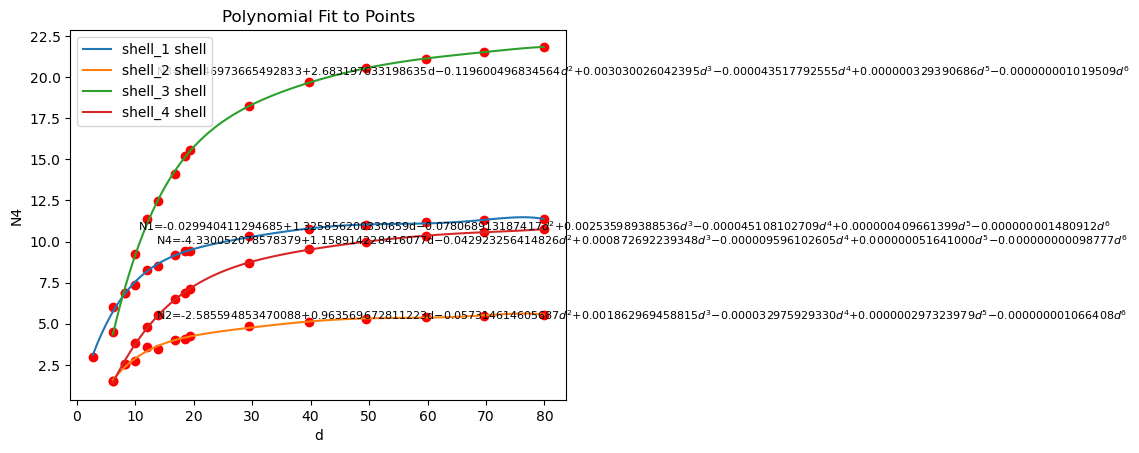

In [100]:
from neighbor_core import fit_polynomial
import matplotlib.pyplot as plt

degree = 6

plt.figure()
for i in range(1, 5):
    shell = f'shell_{i}'
    polynomial = fit_polynomial(np.array(sizes_all[shell]), 
                                np.array(CNs_all[shell]), 
                                degree=degree, new_figure=False, xlabel="d", ylabel=f"N{i}", )

legend_labels = sum([[ '_nolegend', f'{shell} shell'] for shell in CNs_all.keys()], [])
plt.legend(legend_labels)

## Fitting using Michaelis Menten

In [77]:
from scipy.optimize import curve_fit
import pandas as pd

In [127]:
def fit_michaelis_menten(x, y, new_figure=True, xlabel='x', ylabel='y'):
    """
    Fit a Michaelis-Menten function to the provided points, print the coefficients table,
    and display the Michaelis-Menten equation on the plot.
    
    Parameters:
    x (array-like): The x-coordinates of the data points.
    y (array-like): The y-coordinates of the data points.
    
    Returns:
    pd.DataFrame: A DataFrame containing the coefficients (α, β, and constant) of the Michaelis-Menten function.
    """
    # Define Michaelis-Menten function: y = (α * x) / (1 + β * x) + constant
    def michaelis_menten_function(x, alpha, beta, constant):
        return (alpha * x) / (1 + beta * x) + constant
    
    # Fit the Michaelis-Menten function
    params, _ = curve_fit(michaelis_menten_function, x, y, 
                          bounds=([0, 0, -np.inf], [np.inf, np.inf, 0]))
                          

    alpha, beta, constant = params
    
    # Create a DataFrame to store coefficients
    coeff_table = pd.DataFrame({
        'Coefficient': ['α', 'β', 'C'],
        'Value': [alpha, beta, constant]
    })
    
    # Create the Michaelis-Menten equation as a formatted string
    print_out_equation = f"{ylabel} = ({alpha:.5f} * {xlabel}) / (1 + {beta:.5f} * {xlabel}) + {constant:.5f}"
    latex_equation = f"${ylabel} = \\frac{{{alpha:.5f} \cdot {xlabel}}}{{1 + {beta:.5f} \cdot {xlabel}}} + {constant:.5f}$"
    
    # Print the coefficient table and the equation
    print(coeff_table)
    print("-" * 20)
    print(print_out_equation)
    print("\n")
    
    # Plot the points and the fitted Michaelis-Menten curve
    if new_figure:
        plt.figure()
    plt.scatter(x, y, label='Data Points')
    
    # Dashed line: Plot for the extended range from 0 to max(x) + 10
    x_extended = np.linspace(0, max(x) + 100, 100)
    y_extended = michaelis_menten_function(x_extended, alpha, beta, constant)
    plt.plot(x_extended, y_extended, linestyle='--', label='Extended Fit (Dashed)')
    
    # Solid line: Plot for the original range of x
    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = michaelis_menten_function(x_fit, alpha, beta, constant)
    plt.plot(x_fit, y_fit, label='Michaelis-Menten Fit (Solid)', linestyle='-')
    
    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('Michaelis-Menten Fit to Points')
    
    # Display the Michaelis-Menten equation on the plot
    x_pos = min(x_fit) + 0.7 * (max(x_fit) - min(x_fit))
    y_pos = max(y_fit) - 0.25 * (max(y_fit) - min(y_fit))
    plt.text(x_pos, y_pos, latex_equation, fontsize=10)
    
    plt.legend()
    plt.grid(True)
    return coeff_table

In [123]:
%matplotlib widget

  Coefficient     Value
0           α  3.296274
1           β  0.220418
2           C -2.700521
--------------------
N1 = (3.29627 * d) / (1 + 0.22042 * d) + -2.70052


  Coefficient     Value
0           α  5.597107
1           β  0.374624
2           C -8.894582
--------------------
N2 = (5.59711 * d) / (1 + 0.37462 * d) + -8.89458


  Coefficient      Value
0           α   9.841158
1           β   0.208740
2           C -22.482768
--------------------
N3 = (9.84116 * d) / (1 + 0.20874 * d) + -22.48277


  Coefficient      Value
0           α   3.661196
1           β   0.162558
2           C -10.055065
--------------------
N4 = (3.66120 * d) / (1 + 0.16256 * d) + -10.05506




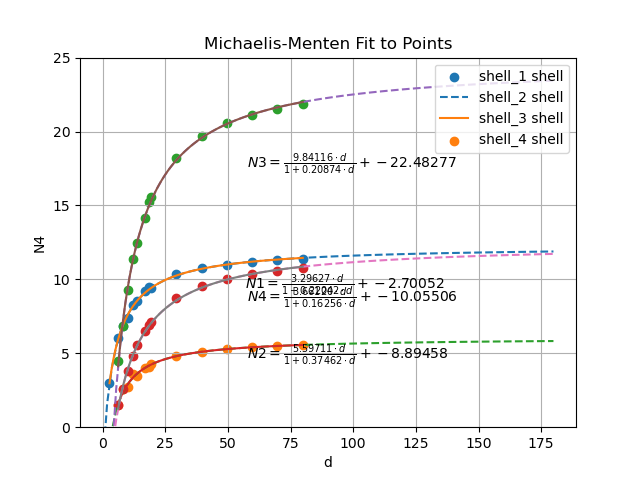

In [128]:
plt.figure()

# Loop through each shell and fit the Michaelis-Menten function
for i in range(1, 5):
    shell = f'shell_{i}'
    fit = fit_michaelis_menten(
        np.array(sizes_all[shell]), 
        np.array(CNs_all[shell]), 
        new_figure=False, 
        xlabel="d", 
        ylabel=f"N{i}"
    )

# Create the legend labels
legend_labels = [f'{shell} shell' for shell in CNs_all.keys()]

# Add the legend with appropriate labels
plt.legend(legend_labels)
plt.ylim(0, 25)

plt.show()

# TODO

1. when the radius is 4 A for the third shell, the diameter should be 0
2. when y is below 0, do not plot it
3. Adding the bulk CN constraints into the fittings

# Example 3: Shrinking Pt xyz file

In [15]:
fc = FileChooser()
display(fc)

FileChooser(path='/Users/juanjuanhuang/Desktop/neighbor', filename='', title='', show_hidden=False, select_des…

In [16]:
cif_cluster = ClusterNeighbor()
if fc.value is not None:
    cif_cluster.load_xyz(path=fc.value)
else:
   cif_cluster.load_xyz(path="test_Pt/Pt_foil_2d_xyz.xyz")
   
cif_cluster.view_xyz(label=False, show_symbol=False)
cif_cluster.get_cluster_size()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

166.49181084505508

In [17]:
center_atom = "Pt"
CN_atom = "Pt"
CN_bond_range = 6
tolerance = 0.1

# Initialize dictionaries to store results
CNs_all = {}
bondlengths_all = {}
num_atoms_all = {}
sizes_all = {}

sizes = np.arange(5, 120, 10)/2 # radius

for size_i in sizes[::-1]:
    cif_cluster.shrink_cluster_size(new_radius=size_i, self_apply=True)
    
    num_atoms = len(cif_cluster.atoms)
    cif_cluster.atoms.set_pbc(False)    
    cif_cluster.get_CN_summary_all(tolerance=tolerance, 
                                   bond_range=CN_bond_range, 
                                   printit=False)
    
    # Get bond lengths for each shell
    bond_lengths = list(cif_cluster.CN_summary[f'{center_atom}-{CN_atom}'].keys())
    cif_cluster.write_to_excel(f"size_{cif_cluster.get_cluster_size():.2f}A")
    # cif_cluster.print_CN_summary()
    for shell_index, bond_length in enumerate(bond_lengths):
        shell_key = f'shell_{shell_index + 1}'
        
        # Ensure the key exists in each dictionary
        if shell_key not in CNs_all:
            CNs_all[shell_key] = []
            bondlengths_all[shell_key] = []
            num_atoms_all[shell_key] = []
            sizes_all[shell_key] = []
        
        # Append data to the relevant shell
        bondlengths_all[shell_key].append(bond_length)
        CNs_all[shell_key].append(cif_cluster.CN_summary[f'{center_atom}-{CN_atom}'][bond_length]['average_CN'])
        sizes_all[shell_key].append(cif_cluster.get_cluster_size())
        num_atoms_all[shell_key].append(num_atoms)
    
    print(f"Processed size: {cif_cluster.get_cluster_size()} A with {len(bond_lengths)} shells")
    # print(cif_cluster.CN_summary[f'{center_atom}-{CN_atom}'])
    cif_cluster.view_xyz(label=False)


Processed size: 114.84879197649056 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 104.75645310401072 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 94.88858132344482 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 84.9615529333498 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 74.95186655943934 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 64.82124140487284 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 54.78394797011256 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 44.90261857078717 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 33.975562231109585 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 23.86365064836476 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 14.145154541849308 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 3.92316 A with 2 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### polynomial fit

  Coefficient         Value
0    Constant  1.974417e+00
1         x^1  6.224028e-01
2         x^2 -2.198194e-02
3         x^3  3.653363e-04
4         x^4 -2.838567e-06
5         x^5  8.310774e-09
--------------------
N0=1.974417269997866+0.622402772341716*d-0.021981942013173*d^2+0.000365336285635*d^3-0.000002838566802*d^4+0.000000008310774*d^5


  Coefficient         Value
0    Constant -3.245169e-01
1         x^1  4.022543e-01
2         x^2 -1.378039e-02
3         x^3  2.244866e-04
4         x^4 -1.719982e-06
5         x^5  4.984059e-09
--------------------
N1=-0.324516919115215+0.402254301513789*d-0.013780387487665*d^2+0.000224486649734*d^3-0.000001719981860*d^4+0.000000004984059*d^5


  Coefficient         Value
0    Constant  3.326463e+00
1         x^1  5.578318e-01
2         x^2 -1.500207e-02
3         x^3  2.071547e-04
4         x^4 -1.411146e-06
5         x^5  3.750379e-09
--------------------
N2=3.326462885698540+0.557831802201305*d-0.015002072624636*d^2+0.000207154718761*d^3-0

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_87876/3210426337.py:13: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x13fa9df00> starts with '_'. It is thus excluded from the legend.

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_87876/3210426337.py:13: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x1594a5ba0> starts with '_'. It is thus excluded from the legend.

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_87876/3210426337.py:13: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x1594a7dc0> starts with '_'. It is thus excluded from the legend.

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_87876/3210426337.py:13: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x13fb7bf10> starts with '_'. It is thus excluded from the legend.



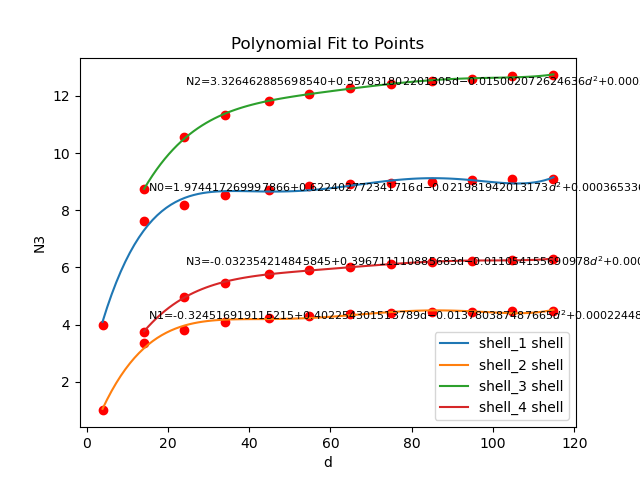

In [18]:
from neighbor_core import fit_polynomial
import matplotlib.pyplot as plt

degree = 5

plt.figure()
for i, shell_i in enumerate(sizes_all.keys()):
    polynomial = fit_polynomial(np.array(sizes_all[shell_i]), 
                                np.array(CNs_all[shell_i]), 
                                degree=degree, new_figure=False, xlabel="d", ylabel=f"N{i}", )

legend_labels = sum([[ '_nolegend', f'{shell_i} shell'] for shell_i in CNs_all.keys()], [])
plt.legend(legend_labels);

# Example 4: Polynomial fits of 2D oxide expanding

## Select a file

In [19]:
fc = FileChooser()
display(fc)

FileChooser(path='/Users/juanjuanhuang/Desktop/neighbor', filename='', title='', show_hidden=False, select_des…

## View the CIF file

In [20]:
cif_cluster = ClusterNeighbor()
if fc.value is not None:
    cif_cluster.load_xyz(path=fc.value)
else:
   cif_cluster.load_xyz(path="structure_examples/PtO2.cif")
   
cif_cluster.view_xyz(label=True, show_symbol=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### expand it

In [21]:
replication_factor = [10, 10, 1]

expanded = ClusterNeighbor()
expanded.load_xyz(from_file=False, atom_object=cif_cluster.expand_cif(replication_factors=replication_factor, self_apply=False))
expanded.view_xyz(label=False, show_symbol=False)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### shift the cell and expand again

In [22]:
shifted_positions = cif_cluster.atoms.get_scaled_positions() +0.3
cif_cluster.atoms.set_scaled_positions(shifted_positions)
cif_cluster.refresh_atoms()
cif_cluster.view_xyz(label=True, show_symbol=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [23]:
replication_factor =[10, 10, 1]

expanded = ClusterNeighbor()
expanded.load_xyz(from_file=False, atom_object=cif_cluster.expand_cif(replication_factors=[10, 10, 1], self_apply=False))
expanded.view_xyz(label=False, show_symbol=False)

# expanded.get_CN_summary_all(tolerance=0.05, bond_range=5, printit=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Calculation loops

In [24]:
center_atom = "Pt"
CN_atom = "O"
CN_bond_range = 4
tolerance = 0.1
undercoordinated_threshold = 6

# Initialize dictionaries to store results
CNs_all = {}
bondlengths_all = {}
num_atoms_all = {}
sizes_all = {}

replication_list = [[i, i, 1] for i in range(2, 11)]  # Generates rows [1,1,1] to [10,10,1]

for replication_factor_i in replication_list:
    expanded_cluster = cif_cluster.expand_cif(replication_factors=replication_factor_i, self_apply=False)
    new_cluster = ClusterNeighbor()
    new_cluster.load_xyz(from_file=False, atom_object=expanded_cluster)
    new_cluster.view_xyz(label=False)

    num_atoms = len(new_cluster.atoms)
    new_cluster.atoms.set_pbc(False)
    new_cluster.get_CN_summary_all(tolerance=tolerance, 
                                   bond_range=CN_bond_range, 
                                   printit=False)
    
    # Get bond lengths for each shell
    bond_lengths = list(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'].keys())
    new_cluster.write_to_excel(f"size_{new_cluster.get_cluster_size():.2f}A")
    # new_cluster.print_CN_summary()
    for shell_index, bond_length in enumerate(bond_lengths):
        shell_key = f'shell_{shell_index + 1}'
        
        # Ensure the key exists in each dictionary
        if shell_key not in CNs_all:
            CNs_all[shell_key] = []
            bondlengths_all[shell_key] = []
            num_atoms_all[shell_key] = []
            sizes_all[shell_key] = []
        
        # Append data to the relevant shell
        bondlengths_all[shell_key].append(bond_length)
        CNs_all[shell_key].append(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'][bond_length]['average_CN'])
        sizes_all[shell_key].append(new_cluster.get_cluster_size())
        num_atoms_all[shell_key].append(num_atoms)

    print(f"Processed size: {new_cluster.get_cluster_size()} A with {len(bond_lengths)} shells")
    print(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'])


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 10.047597679339162 A with 3 shells
defaultdict(<class 'dict'>, {2.0363399403795426: {'average_CN': 2.875, 'info': '1 atoms have CN of 1; \n3 atoms have CN of 2; \n2 atoms have CN of 3; \n2 atoms have CN of 5; ', 'tolerance': 0.1}, 3.354728578154095: {'average_CN': 0.5, 'info': '4 atoms have CN of 0; \n4 atoms have CN of 1; ', 'tolerance': 0.1}, 3.7792168622758076: {'average_CN': 3.0, 'info': '1 atoms have CN of 1; \n2 atoms have CN of 2; \n2 atoms have CN of 3; \n2 atoms have CN of 4; \n1 atoms have CN of 5; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 14.10716465258788 A with 3 shells
defaultdict(<class 'dict'>, {2.0363410548067638: {'average_CN': 3.388888888888889, 'info': '1 atoms have CN of 1; \n5 atoms have CN of 2; \n6 atoms have CN of 3; \n4 atoms have CN of 5; \n2 atoms have CN of 6; ', 'tolerance': 0.1}, 3.354728578154095: {'average_CN': 0.5, 'info': '9 atoms have CN of 0; \n9 atoms have CN of 1; ', 'tolerance': 0.1}, 3.7729428784593093: {'average_CN': 4.222222222222222, 'info': '1 atoms have CN of 1; \n3 atoms have CN of 2; \n2 atoms have CN of 3; \n5 atoms have CN of 4; \n3 atoms have CN of 5; \n2 atoms have CN of 6; \n2 atoms have CN of 8; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 18.86543651953319 A with 3 shells
defaultdict(<class 'dict'>, {2.03634179966326: {'average_CN': 3.65625, 'info': '1 atoms have CN of 1; \n7 atoms have CN of 2; \n12 atoms have CN of 3; \n6 atoms have CN of 5; \n6 atoms have CN of 6; ', 'tolerance': 0.1}, 3.354728578154095: {'average_CN': 0.5, 'info': '16 atoms have CN of 0; \n16 atoms have CN of 1; ', 'tolerance': 0.1}, 3.770560267838251: {'average_CN': 4.9375, 'info': '1 atoms have CN of 1; \n4 atoms have CN of 2; \n2 atoms have CN of 3; \n8 atoms have CN of 4; \n5 atoms have CN of 5; \n6 atoms have CN of 6; \n4 atoms have CN of 8; \n2 atoms have CN of 9; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 23.90882725559321 A with 3 shells
defaultdict(<class 'dict'>, {2.0363422894287755: {'average_CN': 3.82, 'info': '1 atoms have CN of 1; \n9 atoms have CN of 2; \n20 atoms have CN of 3; \n8 atoms have CN of 5; \n12 atoms have CN of 6; ', 'tolerance': 0.1}, 3.354728578154095: {'average_CN': 0.5, 'info': '25 atoms have CN of 0; \n25 atoms have CN of 1; ', 'tolerance': 0.1}, 3.76931776059714: {'average_CN': 5.4, 'info': '1 atoms have CN of 1; \n5 atoms have CN of 2; \n2 atoms have CN of 3; \n11 atoms have CN of 4; \n7 atoms have CN of 5; \n12 atoms have CN of 6; \n6 atoms have CN of 8; \n6 atoms have CN of 9; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 29.243445613524212 A with 3 shells
defaultdict(<class 'dict'>, {2.0363426307565256: {'average_CN': 3.9305555555555554, 'info': '1 atoms have CN of 1; \n11 atoms have CN of 2; \n30 atoms have CN of 3; \n10 atoms have CN of 5; \n20 atoms have CN of 6; ', 'tolerance': 0.1}, 3.354728578154095: {'average_CN': 0.5, 'info': '36 atoms have CN of 0; \n36 atoms have CN of 1; ', 'tolerance': 0.1}, 3.7685569851729617: {'average_CN': 5.722222222222222, 'info': '1 atoms have CN of 1; \n6 atoms have CN of 2; \n2 atoms have CN of 3; \n14 atoms have CN of 4; \n9 atoms have CN of 5; \n20 atoms have CN of 6; \n8 atoms have CN of 8; \n12 atoms have CN of 9; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 34.61764975696029 A with 3 shells
defaultdict(<class 'dict'>, {2.0363428809928834: {'average_CN': 4.010204081632653, 'info': '1 atoms have CN of 1; \n13 atoms have CN of 2; \n42 atoms have CN of 3; \n12 atoms have CN of 5; \n30 atoms have CN of 6; ', 'tolerance': 0.1}, 3.354728578154095: {'average_CN': 0.5, 'info': '49 atoms have CN of 0; \n49 atoms have CN of 1; ', 'tolerance': 0.1}, 3.7680437840899654: {'average_CN': 5.959183673469388, 'info': '1 atoms have CN of 1; \n7 atoms have CN of 2; \n2 atoms have CN of 3; \n17 atoms have CN of 4; \n11 atoms have CN of 5; \n30 atoms have CN of 6; \n10 atoms have CN of 8; \n20 atoms have CN of 9; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 40.00523669681189 A with 3 shells
defaultdict(<class 'dict'>, {2.036343071898686: {'average_CN': 4.0703125, 'info': '1 atoms have CN of 1; \n15 atoms have CN of 2; \n56 atoms have CN of 3; \n14 atoms have CN of 5; \n42 atoms have CN of 6; ', 'tolerance': 0.1}, 3.354728578154095: {'average_CN': 0.5, 'info': '64 atoms have CN of 0; \n64 atoms have CN of 1; ', 'tolerance': 0.1}, 3.767674391110775: {'average_CN': 6.140625, 'info': '1 atoms have CN of 1; \n8 atoms have CN of 2; \n2 atoms have CN of 3; \n20 atoms have CN of 4; \n13 atoms have CN of 5; \n42 atoms have CN of 6; \n12 atoms have CN of 8; \n30 atoms have CN of 9; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 45.40144245250657 A with 3 shells
defaultdict(<class 'dict'>, {2.0363432221756117: {'average_CN': 4.117283950617284, 'info': '1 atoms have CN of 1; \n17 atoms have CN of 2; \n72 atoms have CN of 3; \n16 atoms have CN of 5; \n56 atoms have CN of 6; ', 'tolerance': 0.1}, 3.354728578154095: {'average_CN': 0.5, 'info': '81 atoms have CN of 0; \n81 atoms have CN of 1; ', 'tolerance': 0.1}, 3.767395856979219: {'average_CN': 6.283950617283951, 'info': '1 atoms have CN of 1; \n9 atoms have CN of 2; \n2 atoms have CN of 3; \n23 atoms have CN of 4; \n15 atoms have CN of 5; \n56 atoms have CN of 6; \n14 atoms have CN of 8; \n42 atoms have CN of 9; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 50.80352069981504 A with 3 shells
defaultdict(<class 'dict'>, {2.036343343472872: {'average_CN': 4.155, 'info': '1 atoms have CN of 1; \n19 atoms have CN of 2; \n90 atoms have CN of 3; \n18 atoms have CN of 5; \n72 atoms have CN of 6; ', 'tolerance': 0.1}, 3.354728578154095: {'average_CN': 0.5, 'info': '100 atoms have CN of 0; \n100 atoms have CN of 1; ', 'tolerance': 0.1}, 3.767178361628022: {'average_CN': 6.4, 'info': '1 atoms have CN of 1; \n10 atoms have CN of 2; \n2 atoms have CN of 3; \n26 atoms have CN of 4; \n17 atoms have CN of 5; \n72 atoms have CN of 6; \n16 atoms have CN of 8; \n56 atoms have CN of 9; ', 'tolerance': 0.1}})


### polynomial fit

  Coefficient         Value
0    Constant -7.385491e-01
1         x^1  6.334356e-01
2         x^2 -3.659978e-02
3         x^3  1.084151e-03
4         x^4 -1.590913e-05
5         x^5  9.159798e-08
--------------------
N0=-0.738549075991630+0.633435631980851*d-0.036599782158633*d^2+0.001084151374671*d^3-0.000015909134386*d^4+0.000000091597984*d^5


  Coefficient         Value
0    Constant  5.000000e-01
1         x^1 -6.746830e-16
2         x^2  5.421123e-17
3         x^3 -1.918164e-18
4         x^4  3.114368e-20
5         x^5 -1.876955e-22
--------------------
N1=0.500000000000003-0.000000000000001*d+0.000000000000000*d^2-0.000000000000000*d^3+0.000000000000000*d^4-0.000000000000000*d^5


  Coefficient         Value
0    Constant -4.925842e+00
1         x^1  1.352179e+00
2         x^2 -7.476953e-02
3         x^3  2.162936e-03
4         x^4 -3.127176e-05
5         x^5  1.782310e-07
--------------------
N2=-4.925842108784088+1.352179424522323*d-0.074769528257451*d^2+0.002162936491815*d^3-

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_87876/3210426337.py:13: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x13fe371c0> starts with '_'. It is thus excluded from the legend.

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_87876/3210426337.py:13: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x15977fd00> starts with '_'. It is thus excluded from the legend.

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_87876/3210426337.py:13: UserWarning:

The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x13fe670a0> starts with '_'. It is thus excluded from the legend.



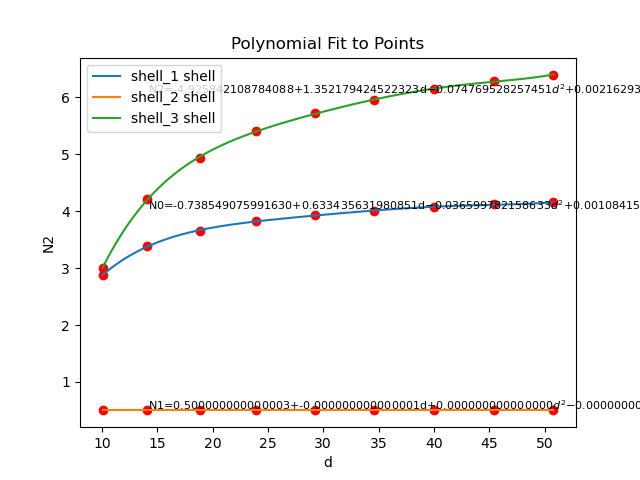

In [25]:
from neighbor_core import fit_polynomial
import matplotlib.pyplot as plt

degree = 5

plt.figure()
for i, shell_i in enumerate(sizes_all.keys()):
    polynomial = fit_polynomial(np.array(sizes_all[shell_i]), 
                                np.array(CNs_all[shell_i]), 
                                degree=degree, new_figure=False, xlabel="d", ylabel=f"N{i}", )

legend_labels = sum([[ '_nolegend', f'{shell_i} shell'] for shell_i in CNs_all.keys()], [])
plt.legend(legend_labels);

# ASE cluster magic numbers

In [26]:
from ase.cluster import Cluster
from ase.cluster import Icosahedron

# Create a simple cluster with 13 atoms
atoms = Icosahedron('Cu', noshells=3)

view = ClusterNeighbor()
view.load_xyz(from_file=False, atom_object=atoms)
view.view_xyz(label=True, show_symbol=True)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# make a example of flat Pt, shrinking it smaller

# Wulff construction examples

In [27]:
from ase.cluster.wulff import wulff_construction
import py3Dmol

# Create a Wulff construction for Cu with specific Miller indices and surface energies
atoms = wulff_construction('Cu', surfaces=[(1, 0, 0), 
                                           (1, 1, 1), 
                                           (1, 1, 0)], 
                           energies=[1.0, 1.0, 1.0], 
                           size=60, 
                           structure='fcc')


view = ClusterNeighbor()
view.load_xyz(from_file=False, atom_object=atoms)
view.view_xyz(label=True, show_symbol=True)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol